# Momento de Retroalimentación: Módulo 1 Construcción de un modelo estadístico base (Portafolio Implementación)

## Descripción:

La contaminación por mercurio de peces en el agua dulce comestibles es una amenaza directa contra nuestra salud. Se llevó a cabo un estudio reciente en 53 lagos de Florida con el fin de examinar los factores que influían en el nivel de contaminación por mercurio. Las variables que se midieron se encuentran en mercurio.csv  Descargar mercurio.csv  y su descripción es la siguiente: 

Alrededor de la principal pregunta de investigación que surge en este estudio: ¿Cuáles son los principales factores que influyen en el nivel de contaminación por mercurio en los peces de los lagos de Florida? pueden surgir preguntas paralelas que desglosan esta pregunta general:

1. ¿Hay evidencia para suponer que la concentración promedio de mercurio en los lagos es dañino para la salud humana? Considera que las normativas de referencia para evaluar los niveles máximos de Hg (Reglamento 34687-MAG y los reglamentos internacionales CE 1881/2006 y Codex Standard 193-1995) establecen que la concentración promedio de mercurio en productos de la pesca no debe superar los 0.5 mg de Hg/kg.
2. ¿Habrá diferencia significativa entre la concentración de mercurio por la edad de los peces?
3. Si el muestreo se realizó lanzando una red y analizando los peces que la red encontraba ¿Habrá influencia del número de peces encontrados en la concentración de mercurio en los peces?
4. ¿Las concentraciones de alcalinidad, clorofila, calcio en el agua del lago influyen en la concentración de mercurio de los peces?

## Preparación de los datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from scipy.stats import norm
import statsmodels.api as sm
from scipy import stats
# plt.style.use('ggplot')


In [2]:
df = pd.read_csv("mercurio.csv")

In [3]:
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
0,1,Alligator,5.9,6.1,3.0,0.7,1.23,5,0.85,1.43,1.53,1
1,2,Annie,3.5,5.1,1.9,3.2,1.33,7,0.92,1.90,1.33,0
2,3,Apopka,116.0,9.1,44.1,128.3,0.04,6,0.04,0.06,0.04,0
3,4,Blue Cypress,39.4,6.9,16.4,3.5,0.44,12,0.13,0.84,0.44,0
4,5,Brick,2.5,4.6,2.9,1.8,1.20,12,0.69,1.50,1.33,1
5,6,Bryant,19.6,7.3,4.5,44.1,0.27,14,0.04,0.48,0.25,1
6,7,Cherry,5.2,5.4,2.8,3.4,0.48,10,0.30,0.72,0.45,1
7,8,Crescent,71.4,8.1,55.2,33.7,0.19,12,0.08,0.38,0.16,1
8,9,Deer Point,26.4,5.8,9.2,1.6,0.83,24,0.26,1.40,0.72,1
9,10,Dias,4.8,6.4,4.6,22.5,0.81,12,0.41,1.47,0.81,1


In [4]:
columns = np.array(["id", "nombre", "alcalinidad", "PH", "calcio", "clorofila", "mercurio", "npeces", "minmercurio", "maxmercurio", "estimacion", "edad"])

In [5]:
df.columns = columns

In [6]:
df = df.set_index('id')

In [7]:
df

,nombre,alcalinidad,PH,calcio,clorofila,mercurio,npeces,minmercurio,maxmercurio,estimacion,edad
id,,,,,,,,,,,
1,Alligator,5.9,6.1,3.0,0.7,1.23,5,0.85,1.43,1.53,1
2,Annie,3.5,5.1,1.9,3.2,1.33,7,0.92,1.90,1.33,0
3,Apopka,116.0,9.1,44.1,128.3,0.04,6,0.04,0.06,0.04,0
4,Blue Cypress,39.4,6.9,16.4,3.5,0.44,12,0.13,0.84,0.44,0
5,Brick,2.5,4.6,2.9,1.8,1.20,12,0.69,1.50,1.33,1
6,Bryant,19.6,7.3,4.5,44.1,0.27,14,0.04,0.48,0.25,1
7,Cherry,5.2,5.4,2.8,3.4,0.48,10,0.30,0.72,0.45,1
8,Crescent,71.4,8.1,55.2,33.7,0.19,12,0.08,0.38,0.16,1
9,Deer Point,26.4,5.8,9.2,1.6,0.83,24,0.26,1.40,0.72,1


## Exploración de los Datos

In [8]:
df.describe()

,alcalinidad,PH,calcio,clorofila,mercurio,npeces,minmercurio,maxmercurio,estimacion,edad
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,37.530189,6.590566,22.201887,23.116981,0.527170,13.056604,0.279811,0.874528,0.513208,0.811321
std,38.203527,1.288449,24.932574,30.816321,0.341036,8.560677,0.226406,0.522047,0.338729,0.394998
min,1.200000,3.600000,1.100000,0.700000,0.040000,4.000000,0.040000,0.060000,0.040000,0.000000
25%,6.600000,5.800000,3.300000,4.600000,0.270000,10.000000,0.090000,0.480000,0.250000,1.000000
50%,19.600000,6.800000,12.600000,12.800000,0.480000,12.000000,0.250000,0.840000,0.450000,1.000000
75%,66.500000,7.400000,35.600000,24.700000,0.770000,12.000000,0.330000,1.330000,0.700000,1.000000
max,128.000000,9.100000,90.700000,152.400000,1.330000,44.000000,0.920000,2.040000,1.530000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53 entries, 1 to 53
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   nombre       53 non-null     object 
 1   alcalinidad  53 non-null     float64
 2   PH           53 non-null     float64
 3   calcio       53 non-null     float64
 4   clorofila    53 non-null     float64
 5   mercurio     53 non-null     float64
 6   npeces       53 non-null     int64  
 7   minmercurio  53 non-null     float64
 8   maxmercurio  53 non-null     float64
 9   estimacion   53 non-null     float64
 10  edad         53 non-null     int64  
dtypes: float64(8), int64(2), object(1)
memory usage: 5.0+ KB


In [10]:
"""sigma = df.alcalinidad.std()
mu = df.alcalinidad.mean()
domain = np.linspace(df.alcalinidad.min(), df.alcalinidad.max())"""

'sigma = df.alcalinidad.std()\nmu = df.alcalinidad.mean()\ndomain = np.linspace(df.alcalinidad.min(), df.alcalinidad.max())'

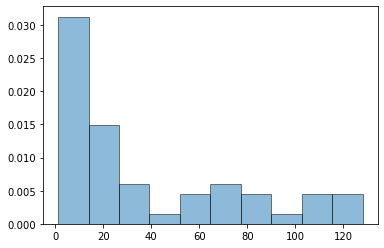

In [11]:
# plt.plot(domain, norm.pdf(domain, mu, sigma))
plt.hist(df.alcalinidad, edgecolor = "black", alpha = 0.5, density = True)
plt.show()

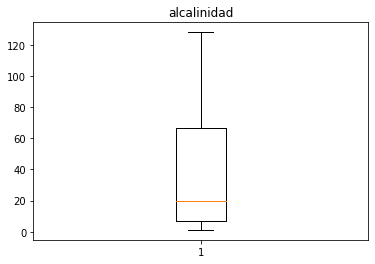

In [12]:
plt.title('alcalinidad')
plt.boxplot(df.alcalinidad)
plt.show()

array([[<AxesSubplot:title={'center':'alcalinidad'}>,
        <AxesSubplot:title={'center':'PH'}>,
        <AxesSubplot:title={'center':'calcio'}>],
       [<AxesSubplot:title={'center':'clorofila'}>,
        <AxesSubplot:title={'center':'mercurio'}>,
        <AxesSubplot:title={'center':'npeces'}>],
       [<AxesSubplot:title={'center':'minmercurio'}>,
        <AxesSubplot:title={'center':'maxmercurio'}>,
        <AxesSubplot:title={'center':'estimacion'}>],
       [<AxesSubplot:title={'center':'edad'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

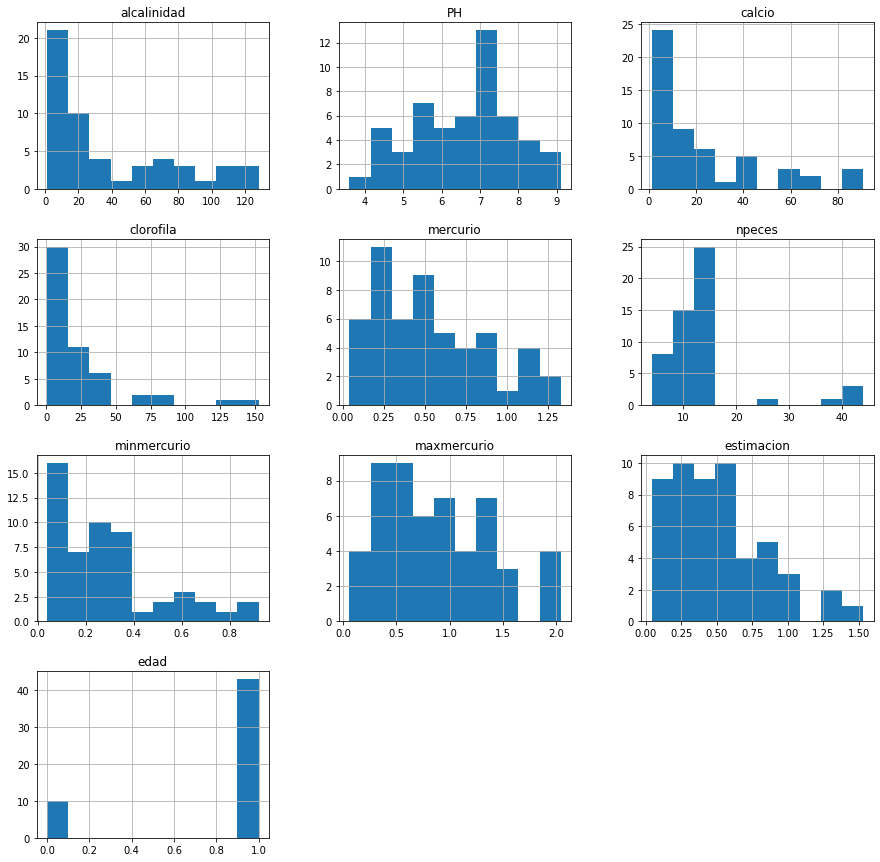

In [13]:
df.hist(figsize = (15,15))

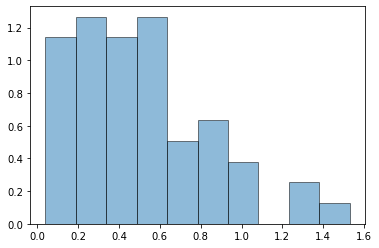

In [14]:
plt.hist(df.estimacion, edgecolor = "black", alpha = 0.5, density = True)
plt.show()

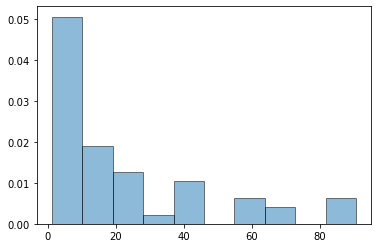

In [15]:
plt.hist(df.calcio, edgecolor = "black", alpha = 0.5, density = True)
plt.show()

In [16]:
df.corr()

,alcalinidad,PH,calcio,clorofila,mercurio,npeces,minmercurio,maxmercurio,estimacion,edad
alcalinidad,1.000000,0.719166,0.832604,0.477531,-0.593897,0.010291,-0.525357,-0.604796,-0.627958,-0.094939
PH,0.719166,1.000000,0.577133,0.608483,-0.575400,-0.018606,-0.541965,-0.551815,-0.612849,0.038000
calcio,0.832604,0.577133,1.000000,0.409914,-0.400680,-0.089379,-0.332476,-0.407917,-0.464409,-0.002111
clorofila,0.477531,0.608483,0.409914,1.000000,-0.491375,-0.011820,-0.400459,-0.484972,-0.506442,-0.283002
mercurio,-0.593897,-0.575400,-0.400680,-0.491375,1.000000,0.079034,0.927205,0.915864,0.959215,0.108739
npeces,0.010291,-0.018606,-0.089379,-0.011820,0.079034,1.000000,-0.081653,0.161092,0.025800,0.207956
minmercurio,-0.525357,-0.541965,-0.332476,-0.400459,0.927205,-0.081653,1.000000,0.765353,0.919089,0.100662
maxmercurio,-0.604796,-0.551815,-0.407917,-0.484972,0.915864,0.161092,0.765353,1.000000,0.859758,0.093752
estimacion,-0.627958,-0.612849,-0.464409,-0.506442,0.959215,0.025800,0.919089,0.859758,1.000000,0.089411
edad,-0.094939,0.038000,-0.002111,-0.283002,0.108739,0.207956,0.100662,0.093752,0.089411,1.000000


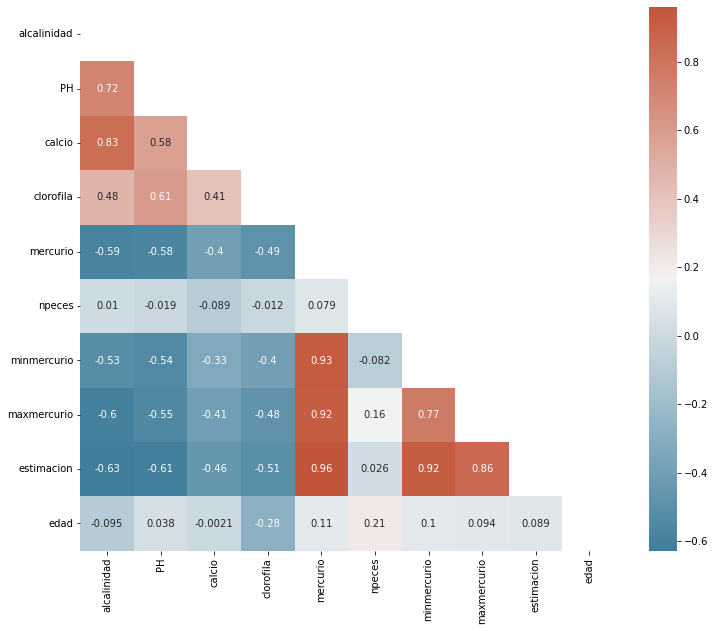

In [17]:
# clf = clf.select_dtypes(include=['float64','int']) 
corr = df.corr(method = 'pearson')
f, ax = plt.subplots(figsize=(12, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)
plt.show()

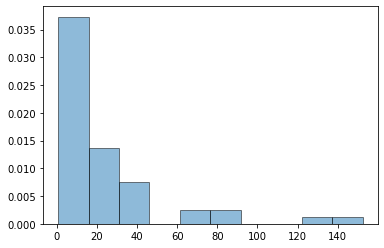

In [18]:
plt.hist(df.clorofila, edgecolor = "black", alpha = 0.5, density = True)
plt.show()

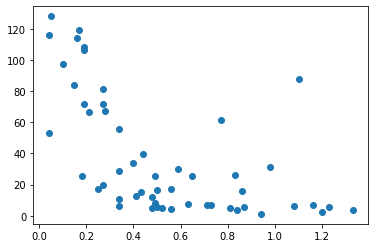

In [19]:
x = df['mercurio']
y = df['alcalinidad']
fig,ax = plt.subplots()
ax.scatter(x,y)

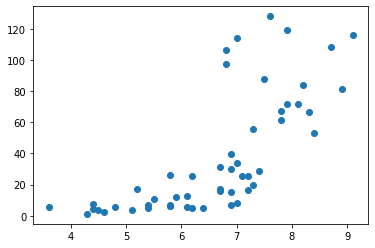

In [20]:
x = df['PH']
y = df['alcalinidad']
fig,ax = plt.subplots()
ax.scatter(x,y)

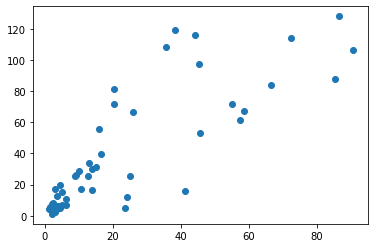

In [21]:
x = df['calcio']
y = df['alcalinidad']
fig,ax = plt.subplots()
ax.scatter(x,y)

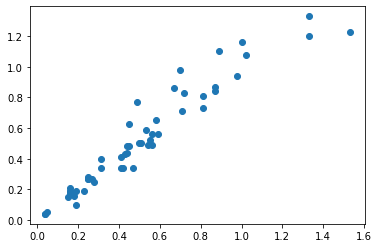

In [22]:
x = df['estimacion']
y = df['mercurio']
fig,ax = plt.subplots()
ax.scatter(x,y)

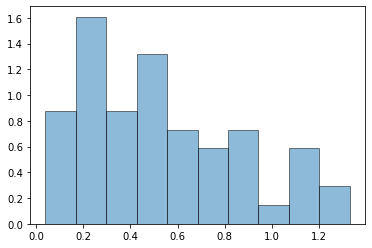

In [23]:
plt.hist(df.mercurio, edgecolor = "black", alpha = 0.5, density = True)
plt.show()

##### Moda

In [24]:
from scipy import stats  

stats.mode(df)

ModeResult(mode=array([['Alligator', 17.3, 5.8, 3.0, 1.6, 0.34, 12, 0.04, 0.06, 0.16, 1]],
      dtype=object), count=array([[ 1,  2,  4,  2,  3,  4, 20,  6,  2,  4, 43]]))

## Distribuciones

In [25]:
#datos = datos[(datos.age > 15) & (datos.male ==0)]
mercurio = df['mercurio']
alcalinidad = df['alcalinidad']
PH = df['PH']
calcio = df['calcio']
npeces = df['npeces']

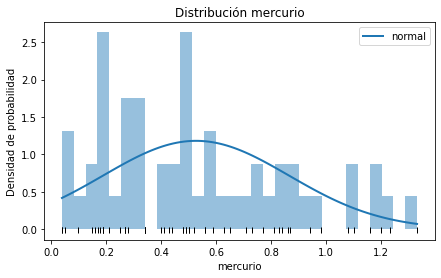

In [26]:
# Histograma + curva normal teórica
# ==============================================================================

# Valores de la media (mu) y desviación típica (sigma) de los datos
mu, sigma = stats.norm.fit(mercurio)

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(min(mercurio), max(mercurio), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label='normal')
ax.hist(x=mercurio, density=True, bins=30, color="#3182bd", alpha=0.5)
ax.plot(mercurio, np.full_like(mercurio, -0.01), '|k', markeredgewidth=1)
ax.set_title('Distribución mercurio')
ax.set_xlabel('mercurio')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

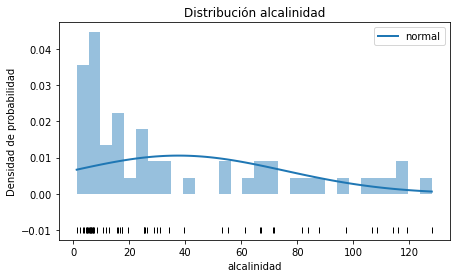

In [27]:
# Histograma + curva normal teórica
# ==============================================================================

# Valores de la media (mu) y desviación típica (sigma) de los datos
mu, sigma = stats.norm.fit(alcalinidad)

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(min(alcalinidad), max(alcalinidad), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label='normal')
ax.hist(x=alcalinidad, density=True, bins=30, color="#3182bd", alpha=0.5)
ax.plot(alcalinidad, np.full_like(alcalinidad, -0.01), '|k', markeredgewidth=1)
ax.set_title('Distribución alcalinidad')
ax.set_xlabel('alcalinidad')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

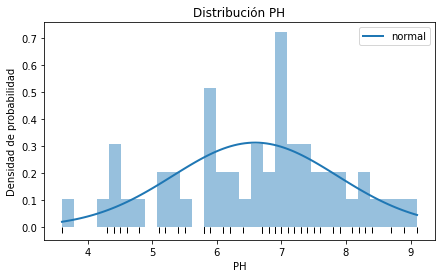

In [28]:
# Histograma + curva normal teórica
# ==============================================================================

# Valores de la media (mu) y desviación típica (sigma) de los datos
mu, sigma = stats.norm.fit(PH)

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(min(PH), max(PH), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label='normal')
ax.hist(x=PH, density=True, bins=30, color="#3182bd", alpha=0.5)
ax.plot(PH, np.full_like(PH, -0.01), '|k', markeredgewidth=1)
ax.set_title('Distribución PH')
ax.set_xlabel('PH')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

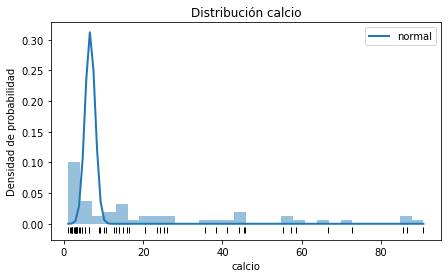

In [29]:
# Histograma + curva normal teórica
# ==============================================================================

# Valores de la media (mu) y desviación típica (sigma) de los datos
mu, sigma = stats.norm.fit(PH)

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(min(calcio), max(calcio), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label='normal')
ax.hist(x=calcio, density=True, bins=30, color="#3182bd", alpha=0.5)
ax.plot(calcio, np.full_like(calcio, -0.01), '|k', markeredgewidth=1)
ax.set_title('Distribución calcio')
ax.set_xlabel('calcio')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

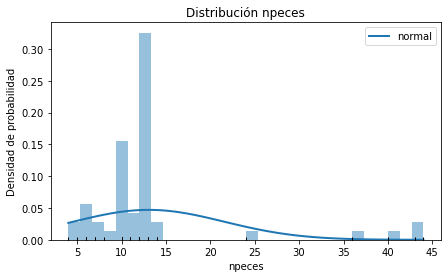

In [30]:
# Histograma + curva normal teórica
# ==============================================================================

# Valores de la media (mu) y desviación típica (sigma) de los datos
mu, sigma = stats.norm.fit(npeces)

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(min(npeces), max(npeces), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label='normal')
ax.hist(x=npeces, density=True, bins=30, color="#3182bd", alpha=0.5)
ax.plot(npeces, np.full_like(npeces, -0.01), '|k', markeredgewidth=1)
ax.set_title('Distribución npeces')
ax.set_xlabel('npeces')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

## QQplots

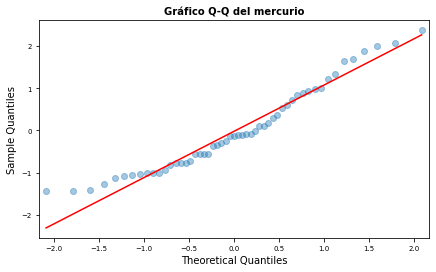

In [31]:
# Gráfico Q-Q
# ==============================================================================
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(
    mercurio,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title('Gráfico Q-Q del mercurio', fontsize = 10,
             fontweight = "bold")
ax.tick_params(labelsize = 7)

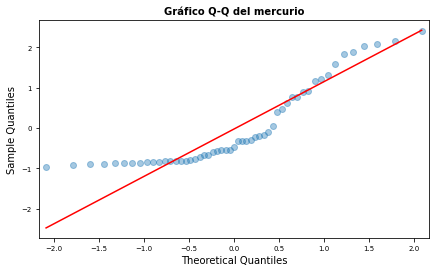

In [32]:
# Gráfico Q-Q
# ==============================================================================
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(
    alcalinidad,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title('Gráfico Q-Q del alcalinidad', fontsize = 10,
             fontweight = "bold")
ax.tick_params(labelsize = 7)

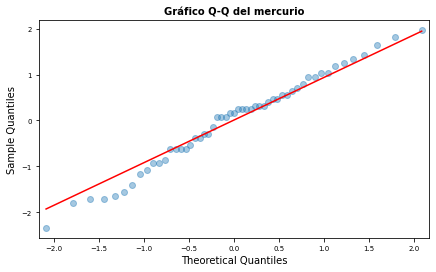

In [33]:
# Gráfico Q-Q
# ==============================================================================
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(
    PH,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title('Gráfico Q-Q del PH', fontsize = 10,
             fontweight = "bold")
ax.tick_params(labelsize = 7)

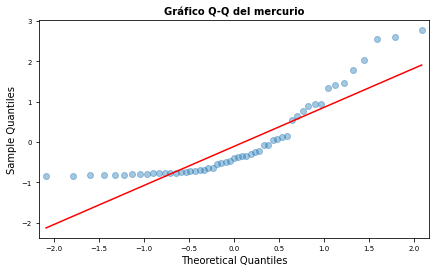

In [34]:
# Gráfico Q-Q
# ==============================================================================
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(
    calcio,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title('Gráfico Q-Q del calcio', fontsize = 10,
             fontweight = "bold")
ax.tick_params(labelsize = 7)

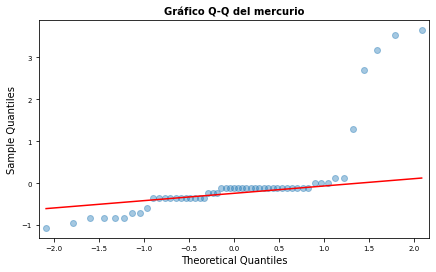

In [35]:
# Gráfico Q-Q
# ==============================================================================
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(
    npeces,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title('Gráfico Q-Q del npeces', fontsize = 10,
             fontweight = "bold")
ax.tick_params(labelsize = 7)

## Análisis de Hipótesis

In [36]:
print('Kursotis:', stats.kurtosis(mercurio))
print('Skewness:', stats.skew(mercurio))

Kursotis: -0.5392793261283986
Skewness: 0.615985316604268


In [37]:
print('Kursotis:', stats.kurtosis(alcalinidad))
print('Skewness:', stats.skew(alcalinidad))

Kursotis: -0.3723123427917301
Skewness: 0.995971540190347


In [38]:
print('Kursotis:', stats.kurtosis(PH))
print('Skewness:', stats.skew(PH))

Kursotis: -0.5316990819046379
Skewness: -0.25300371445201947


In [39]:
print('Kursotis:', stats.kurtosis(calcio))
print('Skewness:', stats.skew(calcio))

Kursotis: 0.7533350422627985
Skewness: 1.3423994221171138


In [40]:
print('Kursotis:', stats.kurtosis(npeces))
print('Skewness:', stats.skew(npeces))

Kursotis: 6.358775112078357
Skewness: 2.655682430492345


##

In [41]:
# Shapiro-Wilk test
# ==============================================================================
shapiro_test = stats.shapiro(mercurio)
shapiro_test

ShapiroResult(statistic=0.9421269297599792, pvalue=0.012508947402238846)

In [42]:
# Shapiro-Wilk test
# ==============================================================================
shapiro_test = stats.shapiro(alcalinidad)
shapiro_test

ShapiroResult(statistic=0.8203012943267822, pvalue=1.5374524764411035e-06)

In [43]:
# Shapiro-Wilk test
# ==============================================================================
shapiro_test = stats.shapiro(PH)
shapiro_test

ShapiroResult(statistic=0.9809678196907043, pvalue=0.5551783442497253)

In [44]:
# Shapiro-Wilk test
# ==============================================================================
shapiro_test = stats.shapiro(calcio)
shapiro_test

ShapiroResult(statistic=0.7913432121276855, pvalue=3.090418942974793e-07)

In [45]:
# Shapiro-Wilk test
# ==============================================================================
shapiro_test = stats.shapiro(npeces)
shapiro_test

ShapiroResult(statistic=0.5829699039459229, pvalue=4.9876252433689316e-11)

In [46]:
# D'Agostino's K-squared test
# ==============================================================================
k2, p_value = stats.normaltest(mercurio)
print(f"Estadístico = {k2}, p-value = {p_value}")

Estadístico = 4.220529123327874, p-value = 0.1212058957577724


In [47]:
# D'Agostino's K-squared test
# ==============================================================================
k2, p_value = stats.normaltest(alcalinidad)
print(f"Estadístico = {k2}, p-value = {p_value}")

Estadístico = 8.45127698441738, p-value = 0.014615999527870203


In [48]:
# D'Agostino's K-squared test
# ==============================================================================
k2, p_value = stats.normaltest(calcio)
print(f"Estadístico = {k2}, p-value = {p_value}")

Estadístico = 15.16551242729508, p-value = 0.0005091559447168802


In [49]:
# D'Agostino's K-squared test
# ==============================================================================
k2, p_value = stats.normaltest(npeces)
print(f"Estadístico = {k2}, p-value = {p_value}")

Estadístico = 47.47518669393924, p-value = 4.9078829412583656e-11


In [50]:
# D'Agostino's K-squared test
# ==============================================================================
k2, p_value = stats.normaltest(PH)
print(f"Estadístico = {k2}, p-value = {p_value}")

Estadístico = 1.1920185572316295, p-value = 0.5510061663930924


De acuerdo a los análisis realizados, en las variables de alcalinidad y calcio se rechaza la normalidad.

<AxesSubplot:>

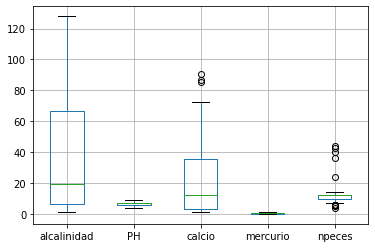

In [55]:
df.boxplot(column=['alcalinidad', 'PH', 'calcio', 'mercurio', 'npeces'])

<AxesSubplot:>

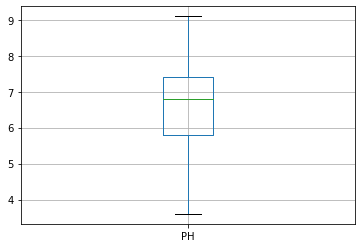

In [56]:
df.boxplot(column='PH')

<AxesSubplot:>

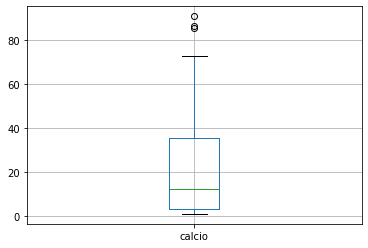

In [58]:
df.boxplot(column='calcio')

<AxesSubplot:>

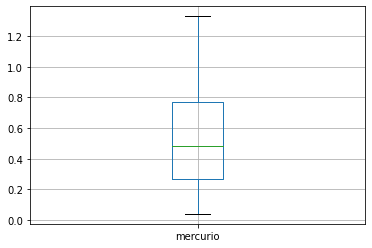

In [59]:
df.boxplot(column='mercurio')

<AxesSubplot:>

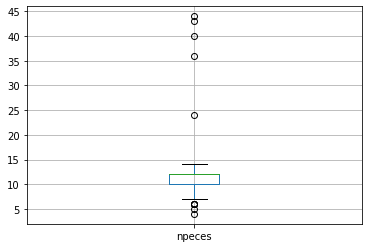

In [60]:
df.boxplot(column='npeces')

La variable con valores atípicos notables es npeces.